# FIT3182 Big data management and processing - S1 2021 Assignment
***

Name: Wong Kai Lin

Student ID: 30507588

Email: kwon0061@student.monash.edu
***


## Part B- 
## Task 2 : Data Visualisation

## 1. Streaming data visualization

a. For the incoming climate data plot the line graph of air temperature against 
arrival time. You need to label some interesting points such as maximum and 
minimum values.

<IPython.core.display.Javascript object>


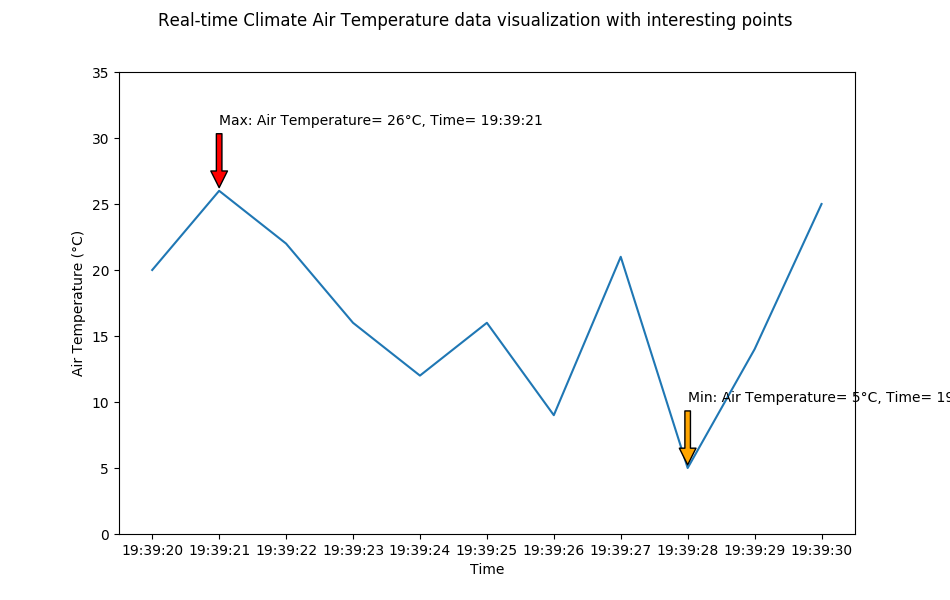

KeyboardInterrupt: 

In [27]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib.pyplot as plt
import json

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'climate'

def annotate_max(x, y, ax = None):
    ymax = max(y)
    xpos = y.index(ymax)
    xmax = x[xpos]
    text = 'Max: Air Temperature= {}°C, Time= {}'.format(ymax, xmax)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+5), arrowprops=dict(facecolor='red', shrink=0.05),)
    
def annotate_min(x, y, ax = None):
    ymin = min(y)
    xpos = y.index(ymin)
    xmin = x[xpos]
    text = 'Min: Air Temperature= {}°C, Time= {}'.format(ymin, xmin)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmin, ymin), xytext=(xmin, ymin+5), arrowprops=dict(facecolor='orange', shrink=0.05),)

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   #auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time Climate Air Temperature data visualization with interesting points') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Air Temperature (°C)')
        ax.set_ylim(0,40) 
        ax.set_yticks([0,5,10,15,20,25,30,35,40])
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y = [], []
        # print('Waiting for messages')

        for message in consumer:
            
            data = str(message.value.decode('utf-8')).split(', ') # decode bytes message from kafka producer

            # convert message in kafka back into JSON
            string_json = ""
            for i in data:
                string_json+=i # combine all the key values pairs into one string_json
                string_json+=',' # append a comma to separate each key
                
            string_json = string_json[:-1] # remove last , from string_json
            climate_json = json.loads(string_json) # parse string_json into json            
            
            # acess air_temperature value  
            temp_val = climate_json['climate']['air_temperature_celcius']
            temp = int(temp_val) # getting the value
            
            # time now
            now = datetime.now()
            current_time = now.strftime("%H:%M:%S")
            
            x.append(current_time) 
            y.append(temp)
            
            # we start plotting only when we have 10 data points
            if len(y) > 10:
                ax.clear()
                ax.plot(x, y)
                ax.set_xlabel('Time')
                ax.set_ylabel('Air Temperature (°C)')
                ax.set_ylim(0,40) 
                ax.set_yticks([0,5,10,15,20,25,30,35,40])
                annotate_max(x,y)
                annotate_min(x,y)
                fig.canvas.draw()
                x.pop(0) # removing the item in the first position
                y.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)
    
    

## 2. Static data visualization

Write python programs using pymongo to get the data from the MongoDB collection(s) 
created in Part B, Task 1 and perform the following visualizations.

a. Plot a bar chart to visualize the total number of fire records based on each 
hour.

b. In a map visualize fire locations as markers. Use a ‘blue’ marker if the cause 
of the fire was ‘natural’. Otherwise, use a ‘red’ marker. Display detailed 
information such as air temperature, surface temperature, relative 
humidity, and confidence with the marker tooltip. See the ssamples below. 
You can use Folium for map visualization.